# Task 2: Customer Segmentation using K-Means

## Objective
Group customers based on their spending behavior using K-Means clustering.
## Dataset
Mall Customers Dataset from Kaggle, containing customer gender, age, income, and spending score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As we can see, data have no missing or invalid values.

#### EDA(Visialization)

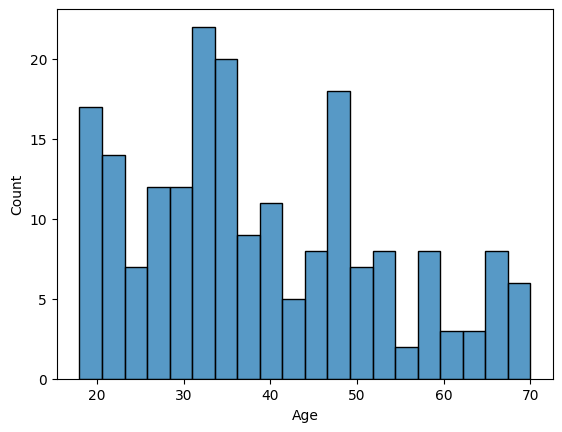

In [5]:
#Age Distribution
sns.histplot(df['Age'], bins=20)
plt.show()

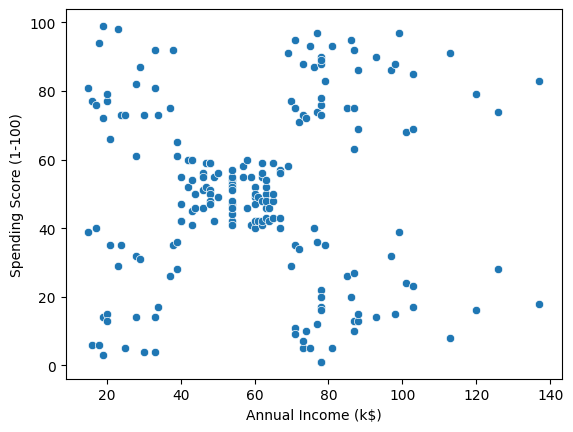

In [6]:
#Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=df)
plt.show()

Exploratory Data Analysis was performed to understand customer age, income, and spending patterns.

#### K-Means Clustering

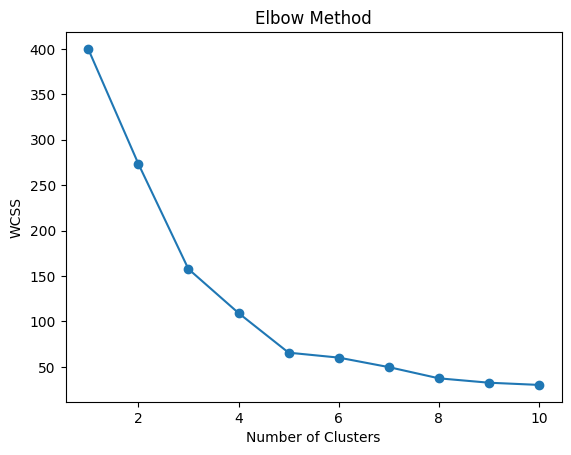

In [11]:
# Select Features for Clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Find Best Number of Clusters (Elbow Method)
wcss = [] #Within-Cluster Sum of Squares: Measures how tight each cluster is

for i in range(1, 11): #number of clusters 1-10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The elbow method was used to choose the best number of clusters by looking for the point where adding more clusters doesn’t improve grouping much.

In [12]:
# Fit K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = kmeans.labels_

# Quick check
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


We chose 5 clusters based on the elbow plot, which showed a clear bend at k=5.

#### Visualize Clusters
Here We are plotting customers colored by their cluster, to see how the groups are separated visually.

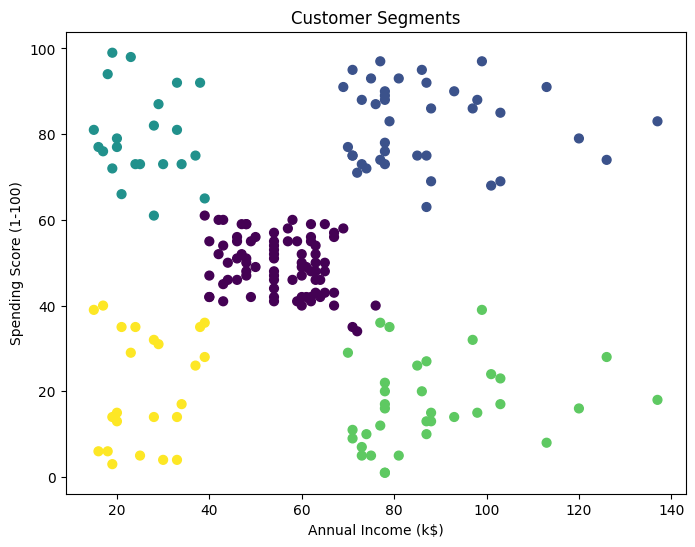

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', s=40) # c: colors points by cluster, cmap: nice color map
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

## Relevant marketing Strategies
Cluster 0: Low income, low spend -> Offer discounts to encourage purchases  
Cluster 1: High income, high spend -> Premium products and loyalty programs  
Cluster 2: Low income, high spend -> Budget-friendly deals  
Cluster 3: High income, low spend -> Encourage trial of premium products  
Cluster 4: Medium income, medium spend -> Loyalty programs and seasonal promotions

## Conclusion
- Customers were grouped into 5 clusters based on Annual Income and Spending Score.
- Cluster visualization shows distinct groups of high/low spenders and income levels.
- This segmentation can help the store design targeted marketing strategies for each group.